# PBC Classification: Data Organization

#### Michele Waters

In [93]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
import cv2

### Load and Label Data

In [65]:
#List of file names with cell images
file_names=['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

In [66]:
#Get list of directories
directories=[f'./PBC_dataset_normal_DIB/{file}' for file in file_names]

In [67]:
directories[0]

'./PBC_dataset_normal_DIB/basophil'

In [68]:
#Get list of images in each file
training_files = [os.listdir(train_dir) for train_dir in directories]

In [69]:
#Get list of all image files
all_files=[]
for files in training_files:
    for file in files:
        all_files.append(file)

In [70]:
len(all_files)

17093

In [71]:
all_files[0]

'BA_689200.jpg'

In [72]:
#check for non-jpg files
[file for file in all_files if 'jpg' not in file]

[]

In [73]:
#Get number of image files for each cell/class type
for i in range(len(file_names)):
    print("Cell type: ", file_names[i],"; Example file: ", training_files[i][0],"; Number of images: ", len(training_files[i]))

Cell type:  basophil ; Example file:  BA_689200.jpg ; Number of images:  1218
Cell type:  eosinophil ; Example file:  EO_430628.jpg ; Number of images:  3117
Cell type:  erythroblast ; Example file:  ERB_728314.jpg ; Number of images:  1551
Cell type:  ig ; Example file:  MY_818396.jpg ; Number of images:  2895
Cell type:  lymphocyte ; Example file:  LY_548542.jpg ; Number of images:  1214
Cell type:  monocyte ; Example file:  MO_648815.jpg ; Number of images:  1420
Cell type:  neutrophil ; Example file:  BNE_358773.jpg ; Number of images:  3330
Cell type:  platelet ; Example file:  PLATELET_70358.jpg ; Number of images:  2348


Note: IG files contain a mix of jpgs that start with 'IG', 'MMY', 'MY', and 'PMY'; Neutrophil files contain a mix of 'BNE' , 'NEUTROPHIL', and 'SNE'

In [124]:
#Create class dictionary to label cell types
image_names=['BA', 'EO', 'ER', 'IG', 'MM', 'MY','PM', 'LY', 'MO', 'BN', 'NE', 'SN', 'PL']
class_dict={image_names[i]:i for i in range(len(image_names))}
class_dict

{'BA': 0,
 'EO': 1,
 'ER': 2,
 'IG': 3,
 'MM': 4,
 'MY': 5,
 'PM': 6,
 'LY': 7,
 'MO': 8,
 'BN': 9,
 'NE': 10,
 'SN': 11,
 'PL': 12}

In [82]:
#Second method of classification, grouping IG, and Neutrophil files
name_class=[0,1,2,3,3,3,3,4,5,6,6,6,7]
class_dict2={image_names[i]:name_class[i] for i in range(len(image_names))}
class_dict2

{'BA': 0,
 'EO': 1,
 'ER': 2,
 'IG': 3,
 'MM': 3,
 'MY': 3,
 'PM': 3,
 'LY': 4,
 'MO': 5,
 'BN': 6,
 'NE': 6,
 'SN': 6,
 'PL': 7}

In [83]:
#Label targets
targets=[]
for file in all_files:
    if '.' not in file[:2]: #remove wrongly named file
        #print(file)
        targets.append(class_dict2[file[:2]])

In [84]:
pd.Series(targets).value_counts()

6    3329
1    3117
3    2895
7    2348
2    1551
5    1420
0    1218
4    1214
dtype: int64

### Read Files and Convert Images

In [86]:
#rel_paths=[f'./PBC_dataset_normal_DIB/{file}' for file in file_names]
rel_path= os.path.join('./PBC_dataset_normal_DIB/basophil', 'BA_689200.jpg')
rel_path

'./PBC_dataset_normal_DIB/basophil/BA_689200.jpg'

In [87]:
#Load Image in Greyscale mode
first_img = cv2.imread(rel_path, cv2.IMREAD_GRAYSCALE)

In [88]:
first_img.shape

(363, 360)

In [89]:
#resize to convert to 80x80 picture
reshaped_img = cv2.resize(first_img, (80,80))

In [90]:
reshaped_img.shape

(80, 80)

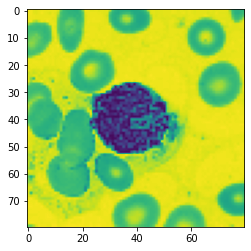

In [92]:
imshow(reshaped_img)

8

In [106]:
#Resize all images
all_resized_imgs=[]
labels=[]
for i in range(len(training_files)):
    for img_name in training_files[i]:
        if '.' not in img_name[:2]:
            gray_img=cv2.imread(os.path.join(f'./PBC_dataset_normal_DIB/{file_names[i]}', img_name), cv2.IMREAD_GRAYSCALE)
            resized_img=cv2.resize(gray_img, (80,80))
            all_resized_imgs.append(resized_img)
            labels.append(i)
#gray_imgs=[cv2.imread(os.path.join(f'./PBC_dataset_normal_DIB/{file_names[i]}', img_name), cv2.IMREAD_GRAYSCALE) for img_name in training_files[i]]
#resized_imgs= [cv2.resize(image, (80,80)) for image in gray_imgs]
# training_files = [os.listdir(train_dir) for train_dir in directories]
# imgs = [cv2.imread(os.path.join('dogs-vs-cats/train', file_name), cv2.IMREAD_GRAYSCALE) for file_name in all_]


In [107]:
len(all_resized_imgs)

17092

In [112]:
all_resized_imgs[0]

array([[234, 234, 230, ..., 166, 168, 171],
       [234, 234, 230, ..., 164, 169, 175],
       [233, 233, 232, ..., 170, 175, 184],
       ...,
       [233, 234, 234, ..., 229, 229, 228],
       [233, 235, 235, ..., 230, 231, 231],
       [193, 198, 213, ..., 233, 231, 233]], dtype=uint8)

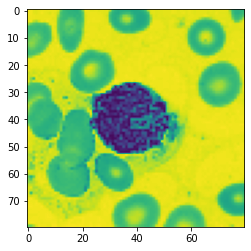

In [108]:
imshow(all_resized_imgs[0])

In [111]:
pd.Series(labels).value_counts()

6    3329
1    3117
3    2895
7    2348
2    1551
5    1420
0    1218
4    1214
dtype: int64

In [113]:
data = np.array(list(zip(all_resized_imgs, labels)))

/Users/michelewaters/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [115]:
data[-1]

array([array([[214, 213, 213, ..., 216, 220, 224],
       [226, 225, 229, ..., 199, 202, 206],
       [203, 205, 210, ..., 195, 206, 203],
       ...,
       [194, 195, 202, ..., 197, 208, 223],
       [200, 207, 219, ..., 217, 230, 232],
       [215, 227, 235, ..., 232, 231, 233]], dtype=uint8),
       7], dtype=object)

In [116]:
#Shuffle data
np.random.shuffle(data)

In [117]:
data[-1]

array([array([[168, 168, 172, ..., 234, 235, 224],
       [178, 178, 182, ..., 232, 231, 233],
       [226, 227, 232, ..., 232, 232, 232],
       ...,
       [231, 233, 234, ..., 232, 231, 231],
       [233, 233, 232, ..., 236, 232, 232],
       [231, 233, 235, ..., 192, 185, 185]], dtype=uint8),
       1], dtype=object)

### Save Data

In [118]:
#Save data
np.save("training_data.npy", data)

In [119]:
#Load data
loaded_data = np.load("./training_data.npy", allow_pickle=True)

In [122]:
first_saved_obs = loaded_data[0][0]

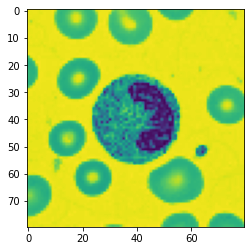

In [123]:
imshow(first_saved_obs)